<a href="https://colab.research.google.com/github/q-viper/SPAIC/blob/master/Day%2036%20-%20Demo%20Crowd%20counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets list.

In [0]:
!kaggle datasets download -d fmena14/crowd-counting

In [0]:
!unzip crowd-counting.zip

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt



In [0]:
images = np.load('images.npy')
labels = np.load('labels.npy')

In [26]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15) 
x_train, x_test = x_train / 255, x_test / 255


del images
del labels

import gc
gc.collect()

22240

In [0]:
#custom cnn
# in_shape = x_train[0].shape
# model = Sequential()
# model.add(Conv2D(32, (5, 5), activation = 'sigmoid', input_shape = in_shape, data_format = 'channels_last'))
# model.add(Conv2D(32, (5, 5), activation='sigmoid'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))

# model.add(Conv2D(32, (5, 5), activation='sigmoid'))
# model.add(Conv2D(32, (5, 5), activation='sigmoid'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation='linear'))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# model.summary()

In [28]:
#VGG modified

in_shape = x_train[0].shape
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=in_shape))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'linear'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 480, 640, 32)      896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 480, 640, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 480, 640, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 160, 213, 32)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 160, 213, 32)      128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 160, 213, 64)      18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 160, 213, 64)      0         
__________

In [0]:
#Compile the model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer= 'rmsprop', metrics=['mse', 'mae'])


In [30]:
gc.collect()

0

In [31]:
history = model.fit(x_train, y_train, batch_size= 32, shuffle = True, epochs=50, validation_split = 0.1)

Train on 1530 samples, validate on 170 samples
Epoch 1/50
1530/1530 [==============================] - 47s 31ms/step - loss: 7710.6673 - mean_squared_error: 7710.6673 - mean_absolute_error: 57.4456 - val_loss: 174.3757 - val_mean_squared_error: 174.3757 - val_mean_absolute_error: 11.0479
Epoch 2/50
1530/1530 [==============================] - 46s 30ms/step - loss: 1431.6672 - mean_squared_error: 1431.6672 - mean_absolute_error: 25.7079 - val_loss: 645.4721 - val_mean_squared_error: 645.4721 - val_mean_absolute_error: 24.3882
Epoch 3/50
1530/1530 [==============================] - 46s 30ms/step - loss: 306.8789 - mean_squared_error: 306.8789 - mean_absolute_error: 13.1625 - val_loss: 353.2264 - val_mean_squared_error: 353.2264 - val_mean_absolute_error: 17.0618
Epoch 4/50
1530/1530 [==============================] - 46s 30ms/step - loss: 104.1831 - mean_squared_error: 104.1831 - mean_absolute_error: 8.1242 - val_loss: 370.9107 - val_mean_squared_error: 370.9107 - val_mean_absolute_error

In [36]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
print("MSE: ", score[0], " MAE: ", score[1])

300/300 [==============================] - 3s 10ms/step
MSE:  13.083059679667155  MAE:  13.083059679667155


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


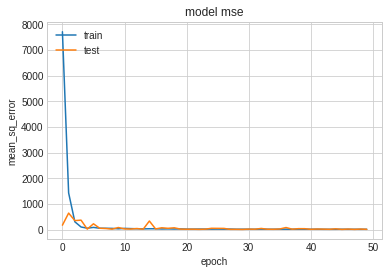

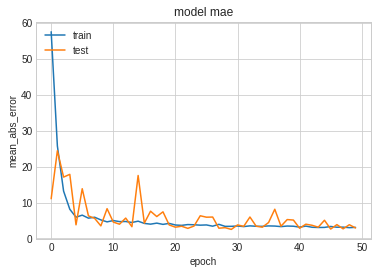

In [37]:
plt.style.use('seaborn-whitegrid')
# list all data in history

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mean_sq_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mean_abs_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

pass1 = [history.history['loss'], history.history['val_loss'], history.history['mean_absolute_error'], history.history['val_mean_absolute_error']]

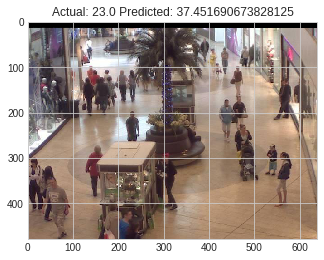

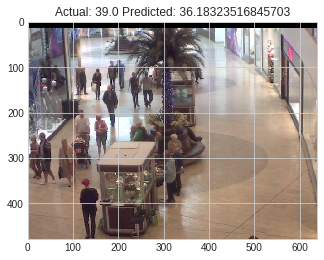

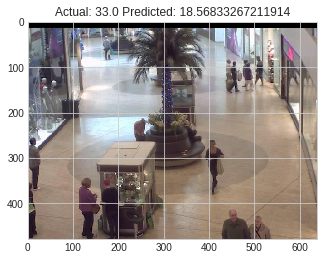

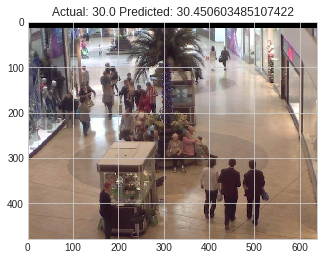

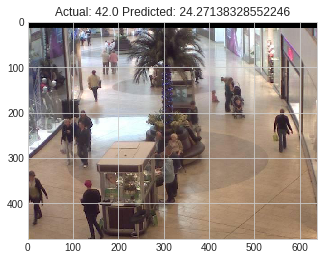

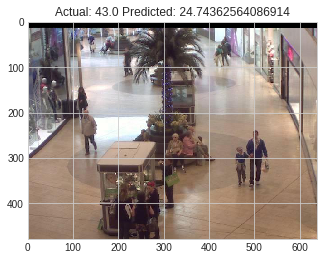

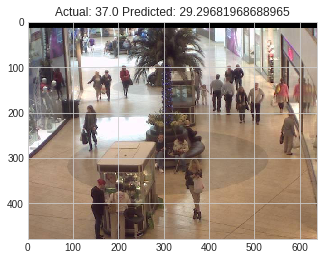

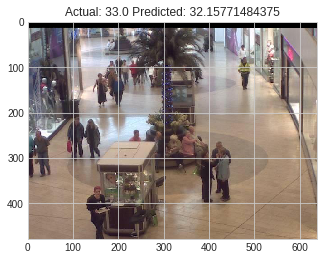

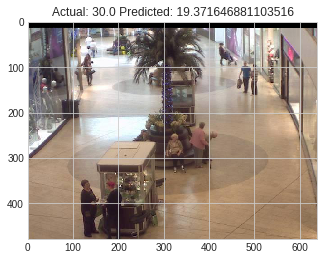

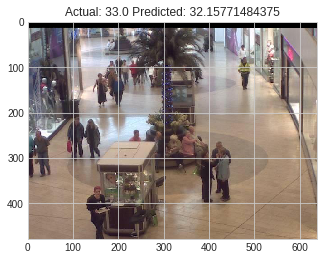

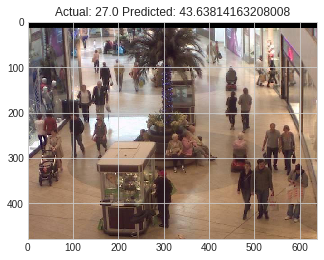

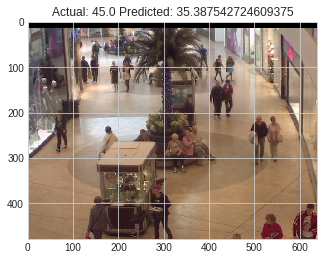

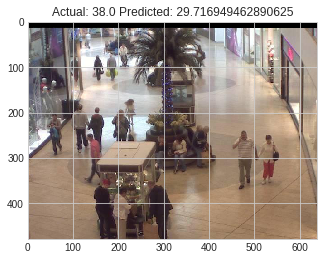

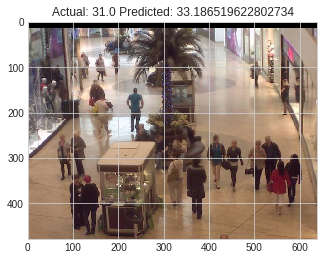

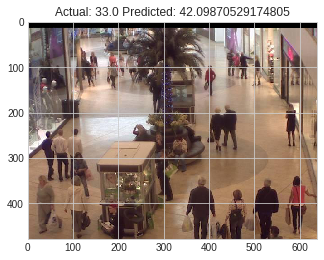

In [44]:
test = np.random.randint(10, len(x_test) - 1, 15, dtype = np.int16)
for i in test:
  img = x_test[i]
  shape = img.shape
  img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
  
  pred = model.predict(img)
  lbl = y_train[i]
  
  title = f'Actual: {float(lbl)}' + f' Predicted: {float(pred)}'
  plt.imshow(img.reshape(shape))
  plt.title(title)
  plt.show()

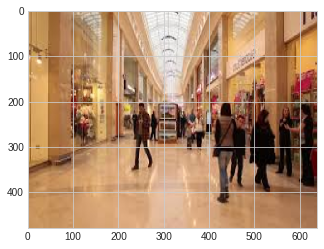

[[0.04011096]]


In [48]:
import cv2 

img = cv2.imread('22.jpg', 1)
img = cv2.resize(img, (shape[1], shape[0]))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img = img.reshape((1, shape[0], shape[1], 3))
pred = model.predict(img / 255)
print(pred)

In [45]:
#save a model

from keras.models import model_from_json
from keras.models import load_model

print(keras.__version__)

model_json = model.to_json()

with open("model1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model1.h5")

2.2.4
